In [1]:
# Import required Libraries

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Machine Learning and Evaluation

from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score, homogeneity_score 
from IPython.display import Image
import warnings
warnings.filterwarnings ("ignore")

In [2]:
data = pd.read_csv("/Users/chuka/Exercises/UNSUPERVISED MACHINE LEARNING/Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<AxesSubplot:>

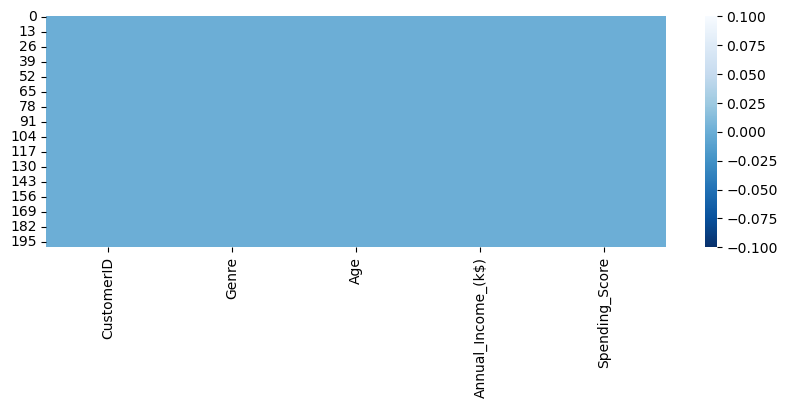

In [12]:
print(data.isnull().sum())

plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar = True, cmap = "Blues_r")

# DATA CLEANING AND PRE-PROCESSING

In [14]:
#Checking Duplicates
print(data.duplicated().sum())

0


# EXPLORATORY DATA ANALYSIS

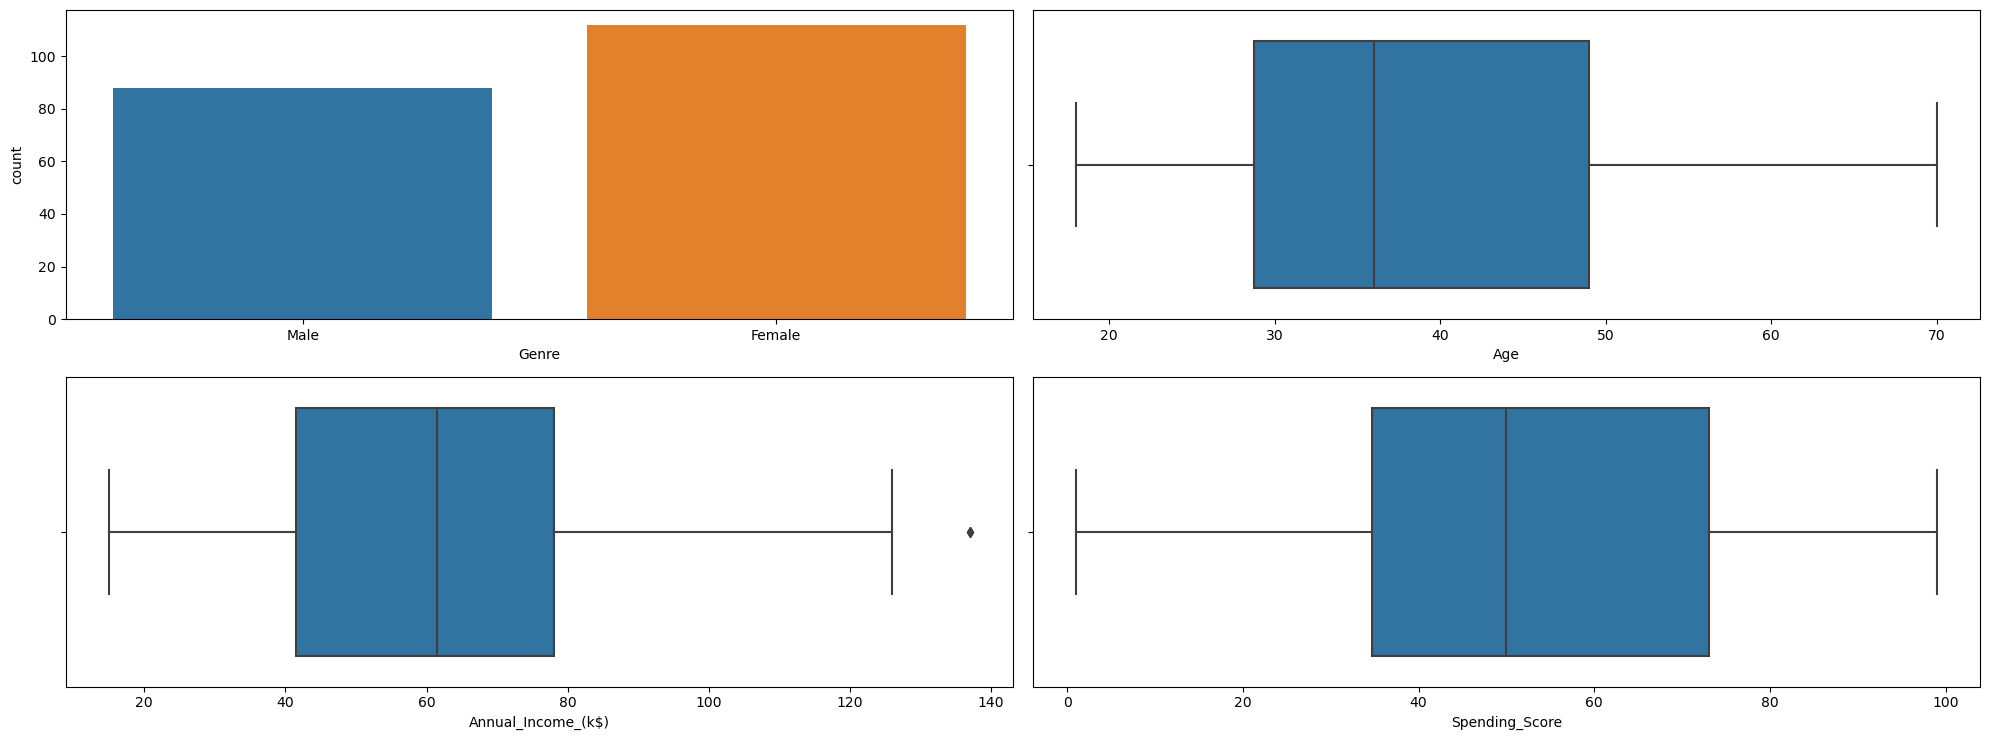

In [19]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(data['Genre'], ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout ()

In [22]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding

encoder = LabelEncoder() # method initialization

# Looping for columns except Survived

for c in data.columns[1:]:
    if(data[c].dtype== 'object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]
        
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
#Remove CustomerID column
data.drop('CustomerID', axis = 1, inplace =True)

data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


After applying the K-means clustering algorithm, we can determine the optimal number of clusters by using the Elbow Method. This method involves plotting the Within Cluster Sum of Squares (WCSS) against the number of clusters (K) and selecting the value of K where the rate of decrease in WCSS slows down significantly. In the graph below, we can observe that after K=3, there is no significant decrease in WCSS, indicating that 3 is the optimal number of clusters in this case. Although the optimal value of K may not always be apparent from the graph, with practice, it becomes easier to identify the elbow point where the rate of decrease in WCSS slows down significantly.

![Alt_text](https://i.imgur.com/gi9p7V5.png)

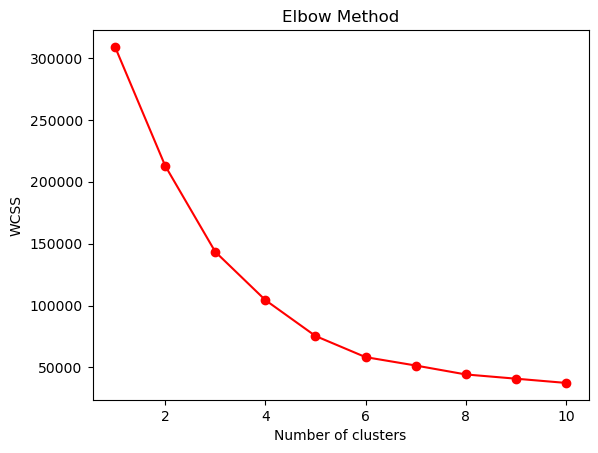

In [27]:
# Determine optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot (range(1, 11), wcss, color='red', marker= 'o')
plt.title('Elbow Method')
plt.xlabel ('Number of clusters') 
plt.ylabel ('WCSS')
plt. show()

In this code block, the objective is to determine the optimal number of clusters for the K-means clustering algorithm. The optimal number of clusters is important because it affects the quality of the clustering results.

The within-cluster sum of squares (WCSS) is used to determine the optimal number of clusters. WCSS measures the sum of the squared distance between each point and its corresponding cluster centroid. The idea is to minimize the WCSS by increasing the number of clusters until a certain point where the WCSS starts to decrease at a slower rate.

The for loop iterates over a range of values from 1 to 10, creating a kMeans clustering model for each value of i. The 'init' parameter is set taken as se tha os a methud to initialize the metroids in a sort a seaned upe coterede. The parameter is set to 42 for reproducibility. The 'fit' method is used to fit the Means model to the data, and the inertia (WCSS) is computed and appended to the 'woss' list.

Finally, a plot is created with the number of clusters on the x-axis and the WCSS on the y-axis. The plot is called the 'Elbow Method' plot because it looks like an elbow where the optimal number of clusters is the point where the WCSS starts to decrease at a slower rate. In this case, the plot shows that the optimal number of clusters is 5, as the WCSS starts to decrease at a slower rate beyond that point.

In [29]:
#Fit K-Means clustering model

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

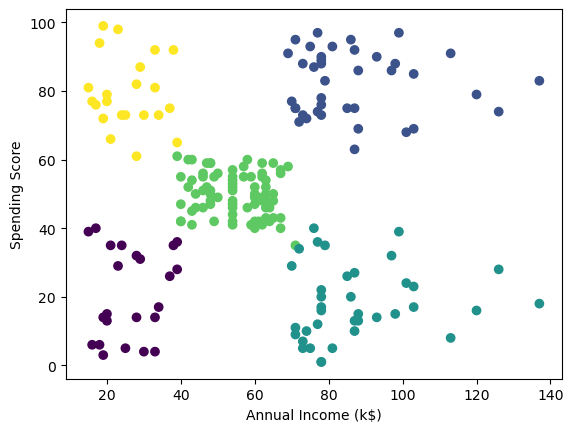

0.44493777835059417

In [30]:
# Visualize cluster results

plt.scatter(data['Annual_Income_(k$)'], data[ 'Spending_Score'], c = data['Cluster'], label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

# Calculate silhouette score

from sklearn.metrics import silhouette_score 
silhouette_score(data, kmeans.labels_)